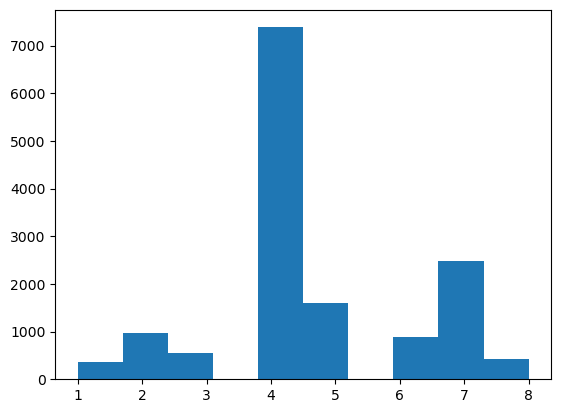

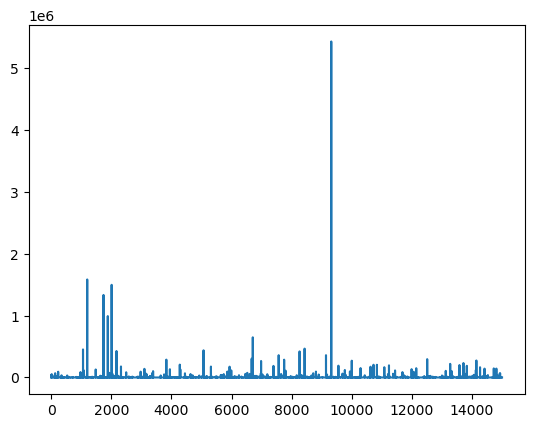

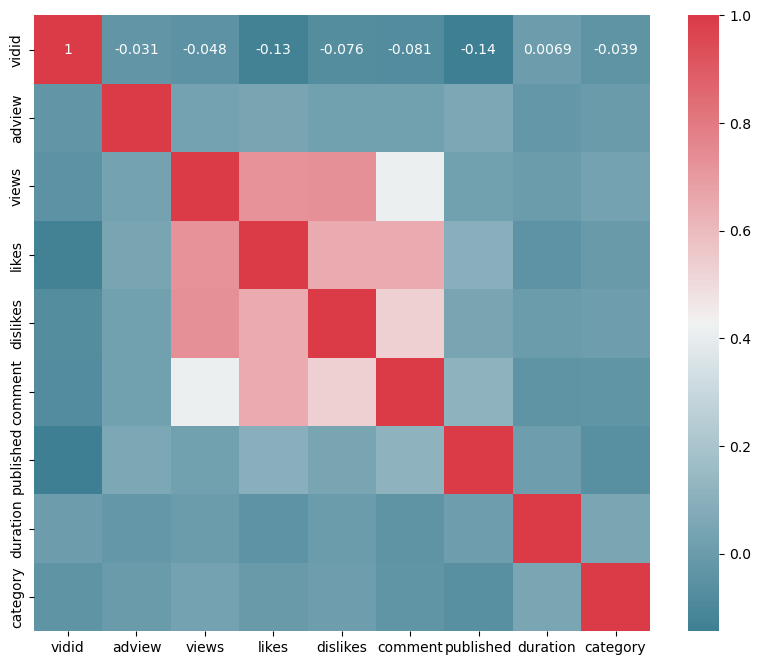

Mean Absolute Error: 3555.823894599666
Mean Squared Error: 831728534.4570614
Root Mean Squared Error: 28839.70413262004
Mean Absolute Error: 3067.9508196721313
Mean Squared Error: 1578707635.6236339
Root Mean Squared Error: 39732.95402589183


C:\Users\sahil\AppData\Local\Temp\ipykernel_23068\1583827970.py:212: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


Mean Absolute Error: 2915.0339256822517
Mean Squared Error: 662110554.6511045
Root Mean Squared Error: 25731.50898511598


C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3555.823894599666
Mean Squared Error: 831728534.4570614
Root Mean Squared Error: 28839.70413262004


In [3]:


# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# %% [markdown]
# Importing data_file
#  

# %%
train_data = pd.read_csv("train_lyst1720633824458 (2).csv")

# %%
train_data.head()

# %%
#THis is to tells that how many data and features we have 
train_data.shape

# %% [markdown]
# Assign eaach category a number of category features

# %%
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
train_data['category'] = train_data['category'].map(category)
train_data.head()

# %% [markdown]
# Removing character 'F' present in data 

# %%
train_data = train_data[train_data.views!= 'F']
train_data = train_data[train_data.likes!= 'F']
train_data = train_data[train_data.dislikes!= 'F']
train_data = train_data[train_data.comment!= 'F']

train_data.head()


# %% [markdown]
# Convert values to integers of views , likes , dislikes , commments , adview

# %%
train_data['views'] = pd.to_numeric(train_data['views'])
train_data['likes'] = pd.to_numeric(train_data['likes'])
train_data['dislikes'] = pd.to_numeric(train_data['dislikes'])
train_data['comment'] = pd.to_numeric(train_data['comment'])
train_data['adview'] = pd.to_numeric(train_data['adview'])

column_vidid = train_data['vidid']  #adding this into some column so we can access it later on

# %% [markdown]
# Encoding features like Category , Duration , Vidid

# %%
from sklearn.preprocessing import LabelEncoder
train_data['duration'] = LabelEncoder().fit_transform(train_data['duration'])
train_data['vidid'] = LabelEncoder().fit_transform(train_data['vidid'])
train_data['published'] = LabelEncoder().fit_transform(train_data['published'])

train_data.head()

# %% [markdown]
# Convert Time in sec for duration

# %%
import datetime
import time

# %%
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mn = ''
    P =  ["H", "M" , "S"]
    for i in y:
        if i not in P:
            mn+=i
        else:
            if(i=="H"):
                h = mn
                mn = ''
            elif(i=='M'):
                m = mn
                mn =''
            else:
                s = mn
                mn = ''
    if(h == ''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s == ''):
        s = '00'
    bp = h+":"+m+":"+s
    return bp


train=pd.read_csv("train_lyst1720633824458 (2).csv")
mp = pd.read_csv("train_lyst1720633824458 (2).csv")['duration']
time = mp.apply(checki)

def func_sec(time_string):
    h, m ,s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1 = time.apply(func_sec)
train_data['duration'] = time1
train_data.head()

# %% [markdown]
# Visualization
#     Individual Plots

# %%
plt.hist(train_data['category'])
plt.show()
plt.plot(train_data['adview'])
plt.show()

# %% [markdown]
# Remove video  with adview greater than 2000000 as outlier
# 

# %%
train_data = train_data[train_data['adview']<2000000]

# %% [markdown]
# HeatMap

# %%
import seaborn as sns

# %%
f, ax = plt.subplots(figsize = (10,8))
corr = train_data.corr()
sns.heatmap(corr , mask = np.zeros_like(corr), cmap=sns.diverging_palette(220,10,as_cmap=True),square=True , ax=ax, annot=True)
plt.show()

# %% [markdown]
# Splitting the data

# %%
y_train = pd.DataFrame(data=train_data.iloc[:,1].values , columns= ['target'])
train_data = train_data.drop(["adview"],axis=1)
train_data=train_data.drop(['vidid'], axis=1)
train_data.head()

# %%
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(train_data ,y_train ,test_size=0.2 , random_state = 42)

X_train.shape

# %% [markdown]
# Normalize Data

# %%
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

# %% [markdown]
# Evaluation Metrics

# %%
from sklearn import metrics
def print_error(X_test , y_test , model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


# %% [markdown]
# Linear Regression

# %%
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train , y_train)
print_error(X_test , y_test , linear_regression)

# %% [markdown]
# Decision Tree Regressor

# %%
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train , y_train)
print_error(X_test, y_test , decision_tree)

# %% [markdown]
# Random Forest Regressor

# %%

from sklearn.ensemble import RandomForestRegressor
n_estimators = 400
max_depth = 20
min_samples_split = 20
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf= min_samples_leaf)
random_forest.fit(X_train, y_train)

print_error(X_test, y_test, random_forest)

# %% [markdown]
# SVM

# %%
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, y_train)
print_error(X_test , y_test , linear_regression)

# %% [markdown]
# Artificial Neural Network

In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

# Define your ANN model
ann = keras.models.Sequential([
    Dense(6, activation='relu', input_shape=X_train.shape[1:]),
    Dense(6, activation='relu'),
    Dense(1)
])

# Initialize the optimizer
optimizer = keras.optimizers.Adam()

# Use the MeanSquaredError class
loss = keras.losses.MeanSquaredError()

# Compile the model
ann.compile(optimizer=optimizer, loss=loss, metrics=["mean_squared_error"])

# Fit the model
history = ann.fit(X_train, y_train, epochs=100)


Epoch 1/100


C:\Users\sahil\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 1174441426944.0000 - mean_squared_error: 1174441426944.0000
Epoch 2/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 160729399296.0000 - mean_squared_error: 160729399296.0000
Epoch 3/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 90650288128.0000 - mean_squared_error: 90650288128.0000
Epoch 4/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 23717105664.0000 - mean_squared_error: 23717105664.0000
Epoch 5/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 887673536.0000 - mean_squared_error: 887673536.0000
Epoch 6/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 716792896.0000 - mean_squared_error: 716792896.0000
Epoch 7/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 1259365760.0000 - mean_squared_error: 1259365760.0000
Epoch 8/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 416161216.0000 - mean_squared_error: 416161216.0000
Epoch 9/100
366/366 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 69361

In [15]:
#saving scikit learn model
import joblib
joblib.dump (decision_tree, "descisiontree_youtubeadview.pkl")

['descisiontree_youtubeadview.pkl']

In [17]:
#saving keras artificicial neural network model
ann.save("ann_youtubeadview.h5")